In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

In [2]:
def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _phi = inv_Q_sqrt.dot(v)
    return _lambda, _phi

In [3]:
N = 5000
X, color = make_swiss_roll(N)

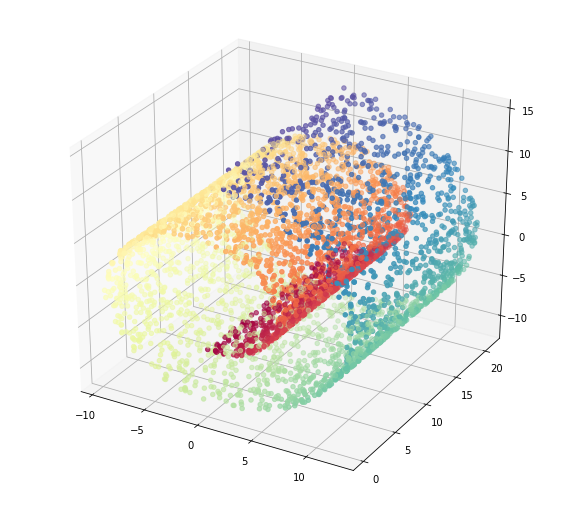

In [4]:
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

In [5]:
_lambda, _phi = create_diffusion_map(X, 10)

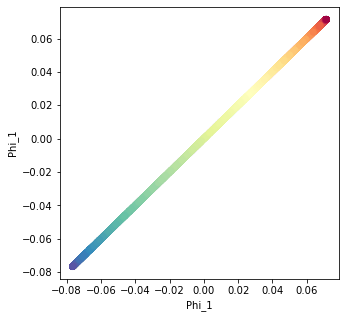

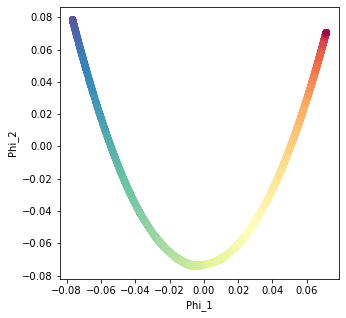

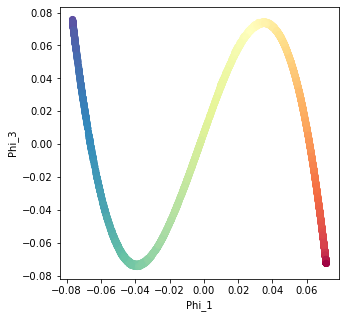

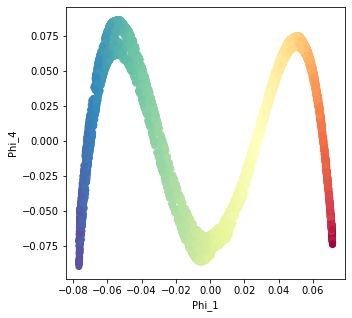

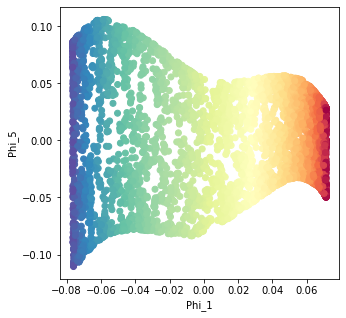

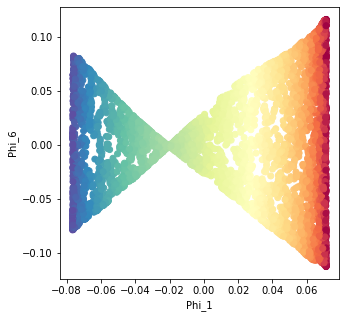

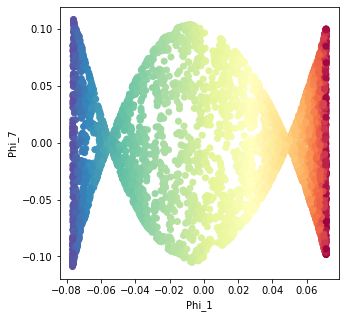

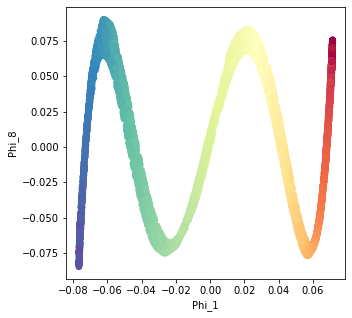

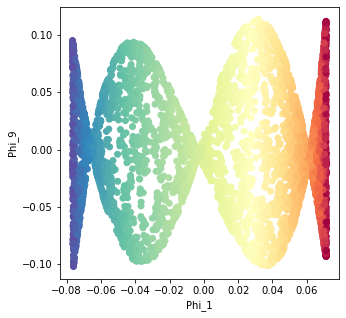

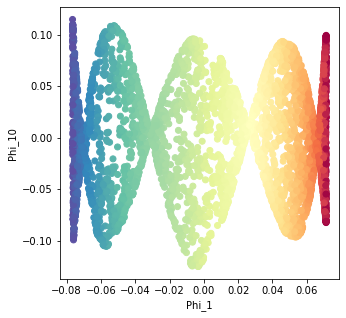

In [17]:
first_non_constant_eigenfunction = _phi[:,-2]
for i in range(10):
    index = -2 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(first_non_constant_eigenfunction, _phi[:,index], c=color, cmap=plt.cm.Spectral)
    plt.xlabel("Phi_1")
    plt.ylabel(f"Phi_{i + 1}")

Calculate PCA

In [7]:
def calculate_pca(data, pc_count):
    U, S, Vt = linalg.svd(data)

    U = U[:, 0:pc_count]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = data.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_data= np.dot(U, np.dot(sigma, Vt))

    print(f"Explained Variance Ratio: {pca_variance_ratio[0:pc_count]}")
    print(f"Sum of Explained Variance ratios (Total Energy Captured): {np.sum(pca_variance_ratio[0:pc_count])}")
    
    return reconstructed_data

In [8]:
calculate_pca(X, 3)

Explained Variance Ratio: [0.28949951 0.39439301 0.31610748]
Sum of Explained Variance ratios (Total Energy Captured): 0.9999999999999998


array([[-2.00235732,  3.22493585,  7.8523806 ],
       [-9.19799061,  3.11565173,  1.27950372],
       [-8.30065038, 15.24028126,  3.5352848 ],
       ...,
       [ 8.68291868, 15.09300639, -8.02080315],
       [-4.57823485, 20.82856628,  7.07635495],
       [-7.32141103,  8.68710069, -7.093838  ]])

Explained Variance Ratio: [0.28949951 0.39439301]
Sum of Explained Variance ratios (Total Energy Captured): 0.6838925212890938


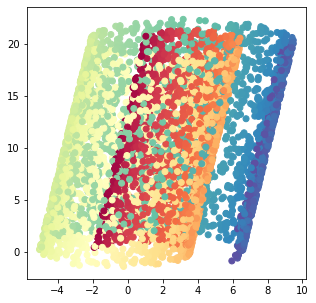

In [9]:
reconstructed_data = calculate_pca(X, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color, cmap=plt.cm.Spectral)

In [10]:
N2 = 1000
X_1000, color_1000 = make_swiss_roll(N2)

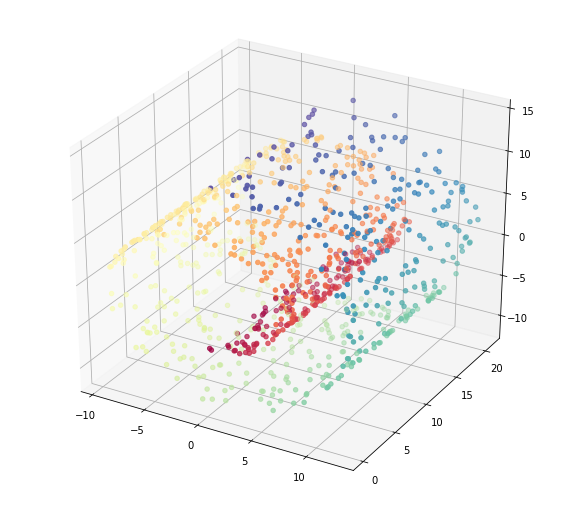

In [11]:
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_1000[:, 0], X_1000[:, 1], X_1000[:, 2], c=color_1000, cmap=plt.cm.Spectral)

In [12]:
_lambda_1000, _phi_1000 = create_diffusion_map(X_1000, 10)

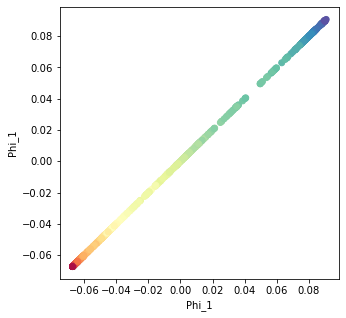

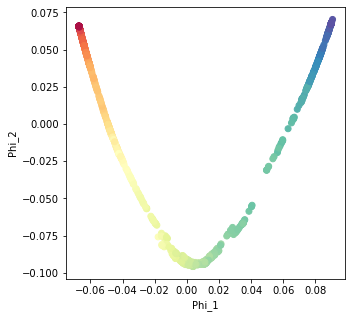

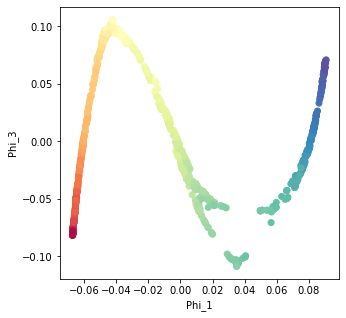

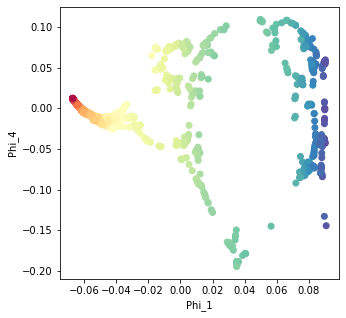

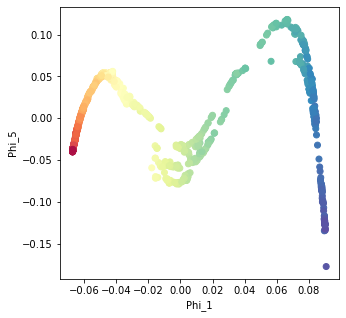

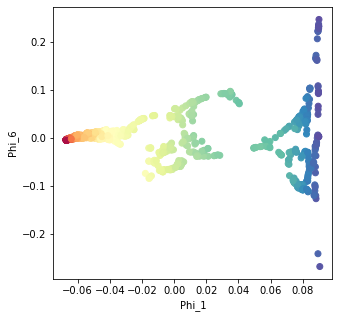

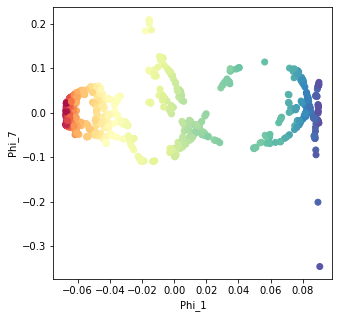

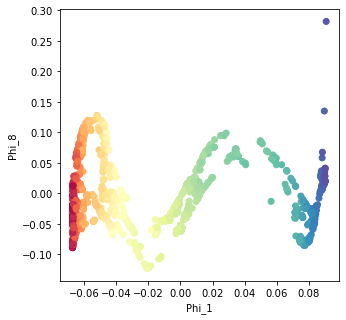

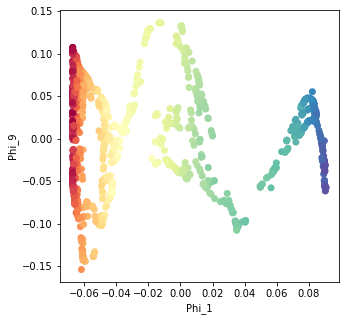

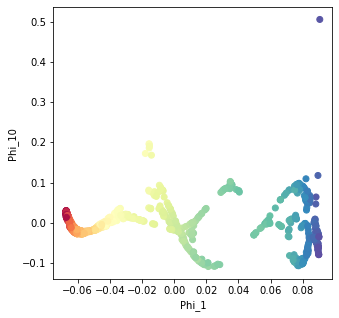

In [18]:
first_non_constant_eigenfunction_1000 = _phi_1000[:,-2]
for i in range(10):
    index = -2 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(first_non_constant_eigenfunction_1000, _phi_1000[:,index], c=color_1000, cmap=plt.cm.Spectral)
    plt.xlabel("Phi_1")
    plt.ylabel(f"Phi_{i + 1}")

Explained Variance Ratio: [0.29537768 0.39987351]
Sum of Explained Variance ratios (Total Energy Captured): 0.6952511882222749


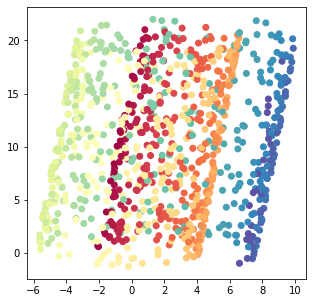

In [26]:
reconstructed_data = calculate_pca(X_1000, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color_1000, cmap=plt.cm.Spectral)